In [1]:
 import sys,tweepy,csv,re

In [2]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
consumerKey = 'ZrxdSQBRJ0wgDDF7lcPF13LXb'
consumerSecret = 'eM7twoZzKfnXsIO8dG3bn8FmAC4Wyjy0Z0cwCin1SbrUmO06VH'
accessToken = '1253408164206215169-PqGnCR49RKQa96GfFEL4UjBb1EuVWW'
accessTokenSecret = 'mOq8Isj3YrK1RDeTKA7TbJ2GYwaOKdk6VzJltP2bEEXhQ'

# Extracción de Información

In [4]:
 def DownloadData(searchTerm,NoOfTerms):
        # authenticating
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

      

        # searching for tweets
        tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en",).items(NoOfTerms)
        return tweets


# Recolección de datos


In [10]:
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))
tweets = DownloadData(searchTerm,NoOfTerms)

Enter Keyword/Tag to search about: 'Messi'
Enter how many tweets to search: 10


In [11]:
for element in tweets:
  print(element)

TweepError: ignored

# Información Relevante en los Tweets


In [ ]:
print("Fecha Publicación Tweet",tweet.created_at)
print("Ubicación",tweet.coordinates)
print("Metadatos",tweet.metadata)
print("Número de Reteweets", tweet.retweet_count)
print("URL en el Tweet", tweet.source_url)
print("Numeró de favoritos",tweet.favorite_count)

NameError: ignored

# Limpieza de Datos

In [ ]:
def cleanTweet(tweet):

        # Remove Links, Special Characters etc from tweet

        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split(' '))
#out = cleanTweet(tweet.text)
#print(out)

In [ ]:
final = []
for tweet in tweets:
  final.append(cleanTweet(tweet.text))
print(final)

TweepError: ignored

['RT  _Priada Todos los seres vivos merecemos una vida de amor y respeto \n\nEste cachorro callejero apareci en un hogar empapado por la l…', 'RT   He hecho este video con mi hermano para decir que no cierren los colegios de #EducacionEspecial No creo que lo vea mucha ge…', 'RT   hola mi amor te queres casar conmigo y criar 2 carpinchos', 'Primero el trailer o cinemática original\n\nHacen un pequeño resumen de las facciones pasado por encima como con un https://t.co/rUlAsSkkkY']
RT  _Priada Todos los seres vivos merecemos una vida de amor y respeto 

Este cachorro callejero apareci en un hogar empapado por la l…RT   He hecho este video con mi hermano para decir que no cierren los colegios de #EducacionEspecial No creo que lo vea mucha ge…RT   hola mi amor te queres casar conmigo y criar 2 carpinchosPrimero el trailer o cinemática original

Hacen un pequeño resumen de las facciones pasado por encima como con un https://t.co/rUlAsSkkkY


279

In [ ]:
print(final)

['RT   Coinbase announce that it might list DigiByte.\n\nThanks   for the shoutout \n\n#DigiByte is a premier UTXO/POW cry…', 'Eidoo Burns 28 Million $EDO in Preparation for Governance Token Upgrade on June 18th  [Cryptocurrency News] Sourc https://t.co/zLSj3Modlp', 'RT   Do u know H-FUNDZ TRADE is the number one trusted platform to change your Bitcoin nd giftcards to cash 💰💹💸💴💰 \n\nThey are…', 'Thu Jun 11 21:58:44 2020 (9:17)\nUSD  9289.01\nWght 0.46\nBlk# 634267\nSize 1298.2 KB\nTXs  2560\nPool 2029 (7.6 MB)\n#bitcoin', 'RT   3 ways #BlackLivesMattters can move forward Point 1 #Bitcoin https://t.co/WiCjwc3VM2', 'RT  _R_Santos The best effective way to peacefully protest is by opting out of the current financial system that supports these crimi…', 'RT  _bayu Atomic wallet Cryptocurrency Wallet Manage your Bitcoin Ethereum XRP Litecoin XLM and over 300 other coins\n\nhttps://t.…', 'RT    Episode 6🚨\n\n LIVE #bitcoin\xa0\xa0Poker Game Tonight 8pm ET Here on our Twitter and   \n\nFollow 

# Importación de los datos a formato CSV

In [ ]:
import csv
import pandas as pd
df = pd.DataFrame(final)
df.columns=["Twitter Text"]
df.to_csv('tweets4.csv',index = False)


In [ ]:
def sentiment_analysis(tweet):
  #polarity = 0
  polarity = 0
  positive = 0
  wpositive = 0
  spositive = 0
  negative = 0
  wnegative = 0
  snegative = 0
  neutral = 0
  for tweet in final:
    analysis = TextBlob(tweet)
    print(analysis.sentiment.polarity)
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
        wpositive += 1
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
        positive += 1
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
        spositive += 1
    elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
        wnegative += 1
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
        negative += 1
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
        snegative += 1



  return neutral,wpositive,positive,spositive,negative,wnegative,snegative
lst_sentimientos = []
lst_sentimientos = sentiment_analysis(final)
print(lst_sentimientos)

0.2
0.0
0.0
0.0
0.0
0.37
-0.125
-0.13181818181818183
-0.0625
0.0
-0.20833333333333334
-0.1
0.0
0.21818181818181817
0.40625
0.0
0.13636363636363635
-0.05
0.0
(8, 3, 2, 0, 0, 6, 0)


In [ ]:
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)

  return format(temp, '.2f')

In [ ]:
num_elements = len(final)
neutral =percentage(lst_sentimientos[0],num_elements)
wpositivo = percentage(lst_sentimientos[1],num_elements)
positivo = percentage(lst_sentimientos[2],num_elements)
spositivo = percentage(lst_sentimientos[3],num_elements)
negativo = percentage(lst_sentimientos[4],num_elements)
wnegativo = percentage(lst_sentimientos[5],num_elements)
snegativo = percentage(lst_sentimientos[6],num_elements)

# Visualización de los Tweets

********Resultados*******
55.56


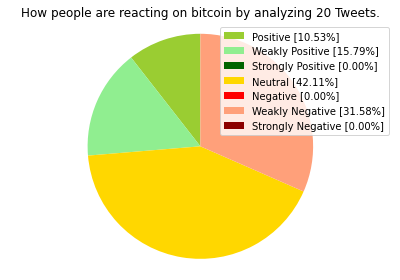

In [ ]:
def visualizacion(neutral,positivo,wpositvo,spositvo,negativo,wnegativo,snegativo,searchTerm,NoOfTerms):
  labels = ['Positive [' + str(positivo) + '%]', 'Weakly Positive [' + str(wpositivo) + '%]','Strongly Positive [' + str(spositivo) + '%]', 'Neutral [' + str(neutral) + '%]',
  'Negative [' + str(negativo) + '%]', 'Weakly Negative [' + str(wnegativo) + '%]', 'Strongly Negative [' + str(snegativo) + '%]']
  sizes = [positivo, wpositivo, spositivo, neutral, negativo, wnegativo, snegativo]
  colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.legend(patches, labels, loc="best")
  plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

visualizacion(neutral,positivo,wpositivo,spositivo,negativo,wnegativo,snegativo,searchTerm,NoOfTerms)